In [1]:
import cv2
import numpy as np
import PIL.Image as Image
import matplotlib.pyplot as plt
import os

In [2]:
def image_to_csv(class_index,image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img = np.array(img)
    img = img.reshape(-1)
    result = str(class_index)
    for index in img:
        result += "," + str(index)
    return result

In [3]:
def protect_train_test_csv():
    main_path = 'data/'
    number_list = os.listdir(main_path)
    for class_index in number_list:
        class_path = main_path + class_index + "/"
        class_list = os.listdir(class_path)
        class_total_num = len(class_list)
        train_num = int(class_total_num * 0.8)
        train_list = class_list
        for index in train_list:
            image_path = class_path + index
            result = image_to_csv(class_index,image_path)
            with open('test_list.txt','a') as f:
                f.write(result+'\n')

In [4]:
protect_train_test_csv()

0


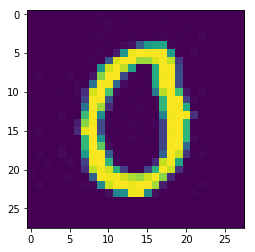

In [5]:
test_file = open('test_list.txt').readlines()[0].split(',')
label = test_file[0]
test_image = np.array(test_file[1:]).reshape(28,28).astype('float32')
plt.imshow(test_image)
print(label)